In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [25]:
# load all pickled data files
# 'olmo_dclm_data_char.pkl', 'olmo_dclm_data_tok.pkl', 'olmo_dclm_chars_per_token.pkl', 'qwen_data_char.pkl', 'qwen_data_tok.pkl', 'qwen_chars_per_token.pkl'

data_files_char = [
    'olmo_dclm_data_char.pkl',
    'qwen_data_char.pkl',
]
data_files_tok = [
    'olmo_dclm_data_tok.pkl',
    'qwen_data_tok.pkl',
]
data_files_char_per_token = [
    'olmo_dclm_chars_per_token.pkl',
    'qwen_chars_per_token.pkl'
]
data = {'char': {}, 'tok': {}, 'char_per_tok': {}}

for file in data_files_char:
    with open(file, 'rb') as f:
        temp = pickle.load(f)
        for k in temp.keys():
            data['char'][k] = temp[k]

for file in data_files_tok:
    with open(file, 'rb') as f:
        temp = pickle.load(f)
        for k in temp.keys():
            data['tok'][k] = temp[k]

for file in data_files_char_per_token:
    with open(file, 'rb') as f:
        temp = pickle.load(f)
        for k in temp.keys():
            data['char_per_tok'][k] = temp[k]
data.keys(), data['char'].keys(), data['tok'].keys(), data['char_per_tok'].keys()       

(dict_keys(['char', 'tok', 'char_per_tok']),
 dict_keys(['olmo', 'dclm', 'qwen']),
 dict_keys(['olmo', 'dclm', 'qwen']),
 dict_keys(['olmo', 'dclm', 'qwen']))

In [51]:
# no data for olmo at the token level, delete the key for olmo in 'tok'
del data['tok']['olmo']
data['tok'].keys()

dict_keys(['dclm', 'qwen'])

In [52]:
data['char']['dclm']['simple']

{'n': array([230., 273., 521., ...,   1.,   1.,   1.], shape=(10387,)),
 'c': array([4.81992500e+00, 3.39405757e+00, 2.40087317e+00, ...,
        3.22980918e-02, 1.34630618e-03, 0.00000000e+00], shape=(10387,)),
 'e': array([3.00481067, 2.98315105, 2.8685229 , ..., 0.18455288, 0.01201381,
        0.01565152], shape=(10387,)),
 'vp': array([    1,     2,     3, ..., 10729, 10734, 10736], shape=(10387,))}

In [53]:
data['tok']['dclm']['simple']

{'e': array([10.37295056,  8.20149625,  7.30324799, ...,  3.44035014,
         3.15094405,  3.4126892 ], shape=(1999,)),
 'c': array([11.02463558,  7.9228311 ,  6.77609869, ...,  3.56728607,
         3.58282124,  3.31123476], shape=(1998,)),
 'n': array([2000, 2000, 2000, ...,  423,  421,  420], shape=(1999,))}

In [73]:
data['char_per_tok']['dclm']

{'simple': 4.3204427602712405,
 'wiki': 4.538547475966953,
 'BBC': 4.545924761351403,
 'c4': 4.652658579289644,
 'BooksumText': 4.413099487071395,
 'BooksumAnalysis': 4.634995208857594,
 'BookChapter': 3.7930947973986995,
 'gpc': 3.59260180090045,
 'poetry': 3.7493240733445146}

In [29]:
descriptions = {
"simple" : "Simple\nEnglish\nWikipedia",
"wiki" : "English\nWikipedia",
"BBC" : "BBC\nNews\nArticles",
"c4": "C4\nInternet\nCorpus",
"BooksumText": "CliffNotes\nChapter\nSummaries",
"BooksumAnalysis": "CliffNotes\nChapter\nAnalyses",
"BookChapter": "CliffNotes\nBook\nChapters",
"gpc": "Gutenberg\nPoetry\nCollection",
"poetry": "Poetry\nFoundation\nPoems",
}

plot entropy per character for all models

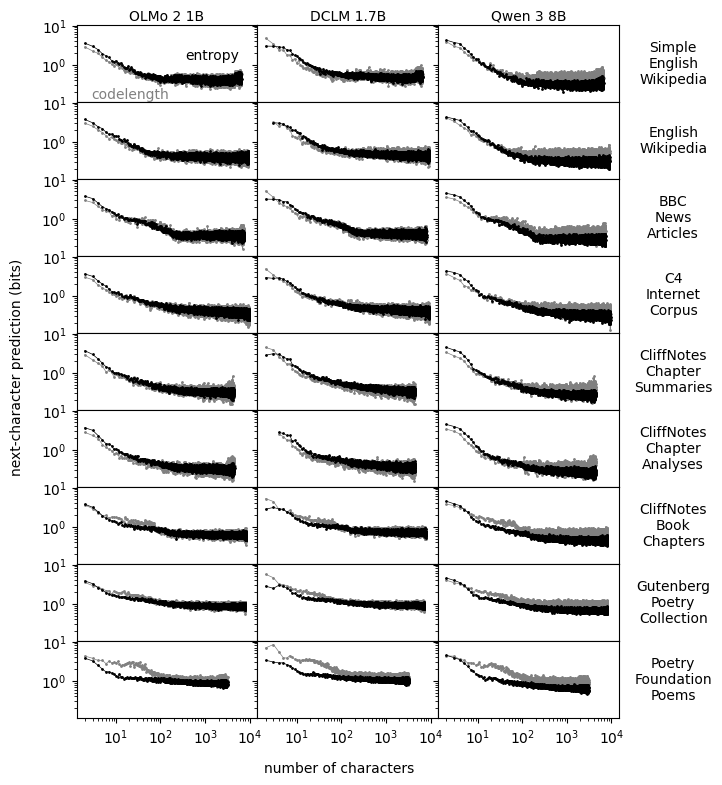

In [50]:
nrows=len(descriptions)
fig, axs = plt.subplots(nrows, 3, sharex=True, sharey=True, figsize=(7, 9), gridspec_kw={'wspace': 0, 'hspace': 0})

line_width = 0.5
marker_size = 1

for model, col in zip(data['char'].keys(), range(len(data['char'].keys()))):
    for row, dataset in enumerate(descriptions.keys()):
        values = data['char'][model][dataset]
        
        # only plot if samples > 200
        mask_samples = values['n'] > 200
        
        axs[row, col].plot(values['vp'][mask_samples] + 1, values['c'][mask_samples], marker='o', label='codelength', c='gray', ms=marker_size, lw=line_width)
        axs[row, col].plot(values['vp'][mask_samples] + 1, values['e'][mask_samples], marker='o', label='entropy', c='k', ms=marker_size, lw=line_width)
        axs[row, col].set_xscale('log')
        axs[row, col].set_yscale('log')
        axs[row, col].tick_params(axis='both', which='major')
        axs[row, col].tick_params(axis='both', which='minor')
        if col == 2:
            axs[row, col].text(1.3, 0.5, descriptions[dataset], va='center', ha='center', transform=axs[row, col].transAxes)
        # if first column, add y tick labels
        axs[row, col].label_outer()

axs[0, 0].text(0.5, 1.02, "OLMo 2 1B",va='bottom', ha='center', transform=axs[0,0].transAxes)
axs[0, 1].text(0.5, 1.02, "DCLM 1.7B",va='bottom', ha='center', transform=axs[0,1].transAxes)
axs[0, 2].text(0.5, 1.02, "Qwen 3 8B",va='bottom', ha='center', transform=axs[0,2].transAxes)
  
axs[0,0].text(0.08, 0.01, "codelength", ha='left', va='bottom', color='gray', transform=axs[0,0].transAxes)
axs[0,0].text(0.9, 0.6, "entropy", ha='right', va='center', transform=axs[0,0].transAxes)

fig.text(0.03, 0.5, 'next-character prediction (bits)', ha='left', va='center',  rotation=90)
fig.text(0.5, 0.05, 'number of characters', ha='center', va='baseline')

# save as pdf
fig.savefig('all_models_char.pdf', bbox_inches='tight')
fig.savefig('all_models_char.png', bbox_inches='tight', dpi=300)

plot entropy per token for dclm, qwen

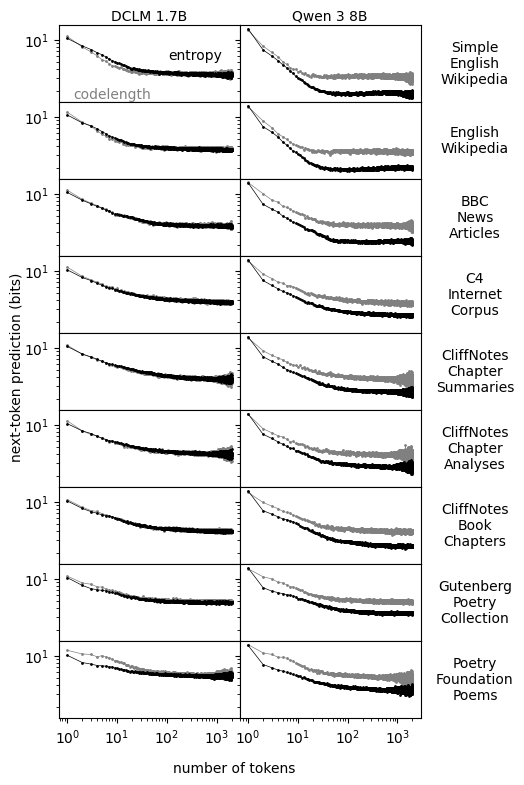

In [75]:
nrows=len(descriptions)
fig, axs = plt.subplots(nrows, 2, sharex=True, sharey=True, figsize=(7/3*2, 9), gridspec_kw={'wspace': 0, 'hspace': 0})

line_width = 0.5
marker_size = 1

for model, col in zip(data['tok'].keys(), range(len(data['tok'].keys()))):
    for row, dataset in enumerate(descriptions.keys()):
        values = data['tok'][model][dataset]
        
        xvals = np.arange(len(values['e'])) + 1
        axs[row, col].plot(xvals, values['e'], marker='o', ms=marker_size, lw=line_width, label='entropy', c='k')
        axs[row, col].plot(xvals[:-1], values['c'], marker='o', ms=marker_size, lw=line_width, label='codelength', c='gray', zorder=-1)
        axs[row, col].set_xscale('log')
        axs[row, col].set_yscale('log')
        axs[row, col].tick_params(axis='both', which='major')
        axs[row, col].tick_params(axis='both', which='minor')
        if col == 1:
            axs[row, col].text(1.3, 0.5, descriptions[dataset], va='center', ha='center', transform=axs[row, col].transAxes)
        # if first column, add y tick labels
        axs[row, col].label_outer()

axs[0, 0].text(0.5, 1.02, "DCLM 1.7B",va='bottom', ha='center', transform=axs[0,0].transAxes)
axs[0, 1].text(0.5, 1.02, "Qwen 3 8B",va='bottom', ha='center', transform=axs[0,1].transAxes)
  
axs[0,0].text(0.08, 0.01, "codelength", ha='left', va='bottom', color='gray', transform=axs[0,0].transAxes)
axs[0,0].text(0.9, 0.6, "entropy", ha='right', va='center', transform=axs[0,0].transAxes)

fig.text(0.02, 0.5, 'next-token prediction (bits)', ha='left', va='center',  rotation=90)
fig.text(0.5, 0.05, 'number of tokens', ha='center', va='baseline')

# save as pdf
fig.savefig('all_models_tok.pdf', bbox_inches='tight')
fig.savefig('all_models_tok.png', bbox_inches='tight', dpi=300)

plot entropy per average characters per token for dclm, qwen on same plot

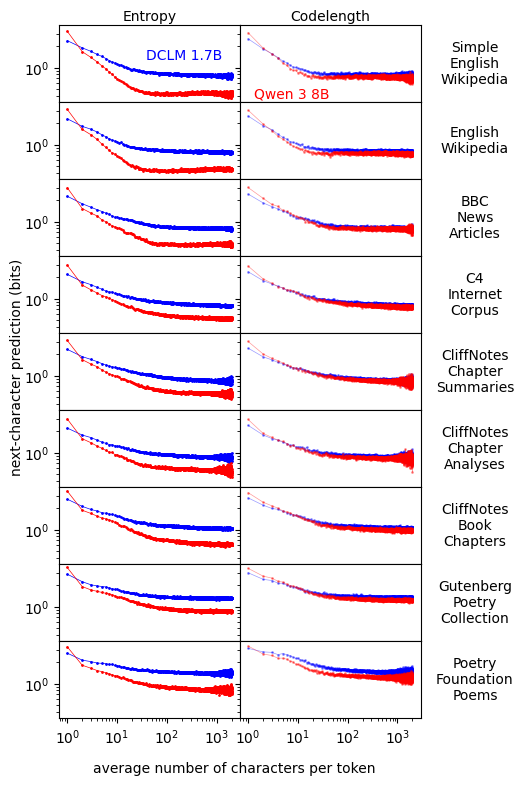

In [76]:
nrows=len(descriptions)
fig, axs = plt.subplots(nrows, 2, sharex=True, sharey=True, figsize=(7/3*2, 9), gridspec_kw={'wspace': 0, 'hspace': 0})

line_width = 0.5
marker_size = 1
colors = ['blue', 'red']
model_names = ["DCLM 1.7B", "Qwen 3 8B"]

for col in range(2):
    for row, dataset in enumerate(descriptions.keys()):
        for i, model in enumerate(data['tok'].keys()):
            values = data['tok'][model][dataset]
            char_per_tok = data['char_per_tok'][model][dataset]
            
            xvals = np.arange(len(values['e'])) + 1
            # plot the average entropy and codelength per character by ent per tok * tok per char
            # need to multiply by 1 / char_per_tok --> divide by char_per_tok
            if col == 0:
                axs[row, col].plot(xvals, values['e'] / char_per_tok, marker='o', ms=marker_size, lw=line_width, label=model_names[i], c=colors[i])
            else:
                axs[row, col].plot(xvals[:-1], values['c'] / char_per_tok, marker='o', ms=marker_size, lw=line_width, label=model_names[i], c=colors[i], alpha=0.4)
        axs[row, col].set_xscale('log')
        axs[row, col].set_yscale('log')
        axs[row, col].tick_params(axis='both', which='major')
        axs[row, col].tick_params(axis='both', which='minor')
        if col == 1:
            axs[row, col].text(1.3, 0.5, descriptions[dataset], va='center', ha='center', transform=axs[row, col].transAxes)
        # if first column, add y tick labels
        axs[row, col].label_outer()

axs[0, 0].text(0.5, 1.02, "Entropy", va='bottom', ha='center', transform=axs[0,0].transAxes)
axs[0, 1].text(0.5, 1.02, "Codelength", va='bottom', ha='center', transform=axs[0,1].transAxes)
  
axs[0,1].text(0.08, 0.01, model_names[1], ha='left', va='bottom', color=colors[1], transform=axs[0,1].transAxes)
axs[0,0].text(0.9, 0.6, model_names[0], ha='right', va='center', color=colors[0], transform=axs[0,0].transAxes)

fig.text(0.02, 0.5, 'next-character prediction (bits)', ha='left', va='center',  rotation=90)
fig.text(0.5, 0.05, 'average number of characters per token', ha='center', va='baseline')

# save as pdf
fig.savefig('all_models_avg_c_per_t.pdf', bbox_inches='tight')
fig.savefig('all_models_avg_c_per_t.png', bbox_inches='tight', dpi=300)